In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | brae
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | dhidhdhoo
Processing Record 10 of Set 1 | addanki
Processing Record 11 of Set 1 | kahului
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | dwarka
Processing Record 15 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | korla
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | kyshtovka
Processing Record 21 of Set 1 | vaini
Processing Record 22 of

Processing Record 37 of Set 4 | port macquarie
Processing Record 38 of Set 4 | heishan
Processing Record 39 of Set 4 | mar del plata
Processing Record 40 of Set 4 | baykit
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | vila
Processing Record 43 of Set 4 | inuvik
Processing Record 44 of Set 4 | gorno-chuyskiy
City not found. Skipping...
Processing Record 45 of Set 4 | mattru
Processing Record 46 of Set 4 | soubre
Processing Record 47 of Set 4 | bilibino
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | kuche
City not found. Skipping...
Processing Record 50 of Set 4 | tautira
Processing Record 1 of Set 5 | denpasar
Processing Record 2 of Set 5 | nara
Processing Record 3 of Set 5 | severo-kurilsk
Processing Record 4 of Set 5 | bredasdorp
Processing Record 5 of Set 5 | victoria
Processing Record 6 of Set 5 | luderitz
Processing Record 7 of Set 5 | nepalganj
City not found. Skipping...
Processing Record 

Processing Record 27 of Set 8 | sobolevo
Processing Record 28 of Set 8 | hutchinson
Processing Record 29 of Set 8 | meadow lake
Processing Record 30 of Set 8 | florianopolis
Processing Record 31 of Set 8 | andenes
Processing Record 32 of Set 8 | suleja
Processing Record 33 of Set 8 | alice springs
Processing Record 34 of Set 8 | saleaula
City not found. Skipping...
Processing Record 35 of Set 8 | krasnovishersk
Processing Record 36 of Set 8 | daxian
City not found. Skipping...
Processing Record 37 of Set 8 | dosso
Processing Record 38 of Set 8 | muisne
Processing Record 39 of Set 8 | san cristobal
Processing Record 40 of Set 8 | chapais
Processing Record 41 of Set 8 | tawkar
City not found. Skipping...
Processing Record 42 of Set 8 | robertsport
Processing Record 43 of Set 8 | barroquinha
Processing Record 44 of Set 8 | basco
Processing Record 45 of Set 8 | bagotville
Processing Record 46 of Set 8 | sardulgarh
Processing Record 47 of Set 8 | baisha
Processing Record 48 of Set 8 | lavre

Processing Record 9 of Set 12 | portree
Processing Record 10 of Set 12 | warqla
City not found. Skipping...
Processing Record 11 of Set 12 | falmouth
Processing Record 12 of Set 12 | haines junction
Processing Record 13 of Set 12 | glace bay
Processing Record 14 of Set 12 | seymchan
Processing Record 15 of Set 12 | tessalit
Processing Record 16 of Set 12 | thaton
Processing Record 17 of Set 12 | homer
Processing Record 18 of Set 12 | biu
Processing Record 19 of Set 12 | parnarama
Processing Record 20 of Set 12 | pendencias
Processing Record 21 of Set 12 | zhanakorgan
Processing Record 22 of Set 12 | puerto escondido
Processing Record 23 of Set 12 | tiruppuvanam
Processing Record 24 of Set 12 | trairi
Processing Record 25 of Set 12 | angoche
Processing Record 26 of Set 12 | schattdorf
Processing Record 27 of Set 12 | atar
Processing Record 28 of Set 12 | eyl
Processing Record 29 of Set 12 | mozarlandia
Processing Record 30 of Set 12 | monte aprazivel
Processing Record 31 of Set 12 | sao

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,78.53,78,75,11.50,US,2022-02-06 01:43:59
1,Thompson,55.7435,-97.8558,-16.44,76,40,3.44,CA,2022-02-06 01:48:28
2,Vila Velha,-20.3297,-40.2925,76.95,86,0,1.01,BR,2022-02-06 01:48:29
3,Puerto Ayora,-0.7393,-90.3518,75.54,92,23,5.01,EC,2022-02-06 01:48:29
4,Busselton,-33.6500,115.3333,71.87,68,71,14.18,AU,2022-02-06 01:48:29
5,Brae,60.3964,-1.3530,39.11,55,97,34.87,GB,2022-02-06 01:48:30
6,Yellowknife,62.4560,-114.3525,-15.59,86,20,5.75,CA,2022-02-06 01:48:30
7,Dhidhdhoo,6.8833,73.1000,80.17,65,56,5.61,MV,2022-02-06 01:48:30
8,Addanki,15.8167,79.9833,68.43,89,49,4.56,IN,2022-02-06 01:44:51
9,Kahului,20.8947,-156.4700,82.42,69,40,23.02,US,2022-02-06 01:44:24


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-02-06 01:43:59,19.7297,-155.0900,78.53,78,75,11.50
1,Thompson,CA,2022-02-06 01:48:28,55.7435,-97.8558,-16.44,76,40,3.44
2,Vila Velha,BR,2022-02-06 01:48:29,-20.3297,-40.2925,76.95,86,0,1.01
3,Puerto Ayora,EC,2022-02-06 01:48:29,-0.7393,-90.3518,75.54,92,23,5.01
4,Busselton,AU,2022-02-06 01:48:29,-33.6500,115.3333,71.87,68,71,14.18
...,...,...,...,...,...,...,...,...,...
547,Naze,JP,2022-02-06 02:04:54,28.3667,129.4833,51.30,66,99,14.67
548,Sanmenxia,CN,2022-02-06 02:04:54,34.7747,111.1814,33.28,54,100,11.01
549,Havoysund,NO,2022-02-06 02:04:54,70.9963,24.6622,31.08,72,30,33.80
550,Dawlatabad,AF,2022-02-06 02:04:55,36.4141,64.9053,45.37,90,100,6.20


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

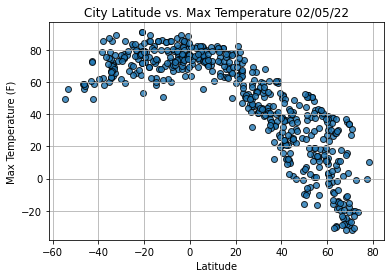

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

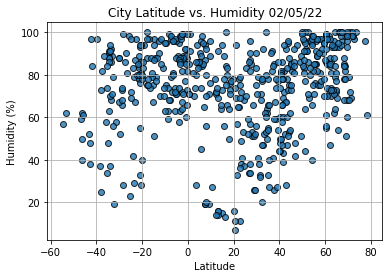

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

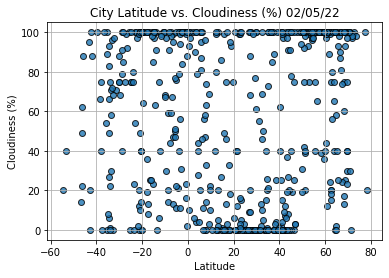

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

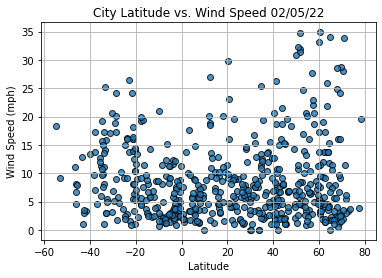

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-02-06 01:43:59,19.7297,-155.0900,78.53,78,75,11.50
1,Thompson,CA,2022-02-06 01:48:28,55.7435,-97.8558,-16.44,76,40,3.44
5,Brae,GB,2022-02-06 01:48:30,60.3964,-1.3530,39.11,55,97,34.87
6,Yellowknife,CA,2022-02-06 01:48:30,62.4560,-114.3525,-15.59,86,20,5.75
7,Dhidhdhoo,MV,2022-02-06 01:48:30,6.8833,73.1000,80.17,65,56,5.61


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

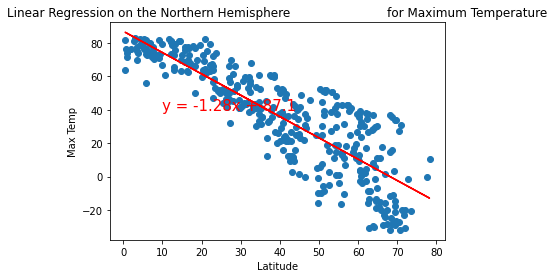

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

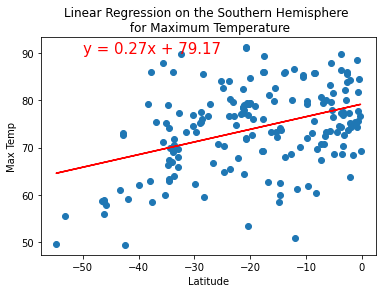

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

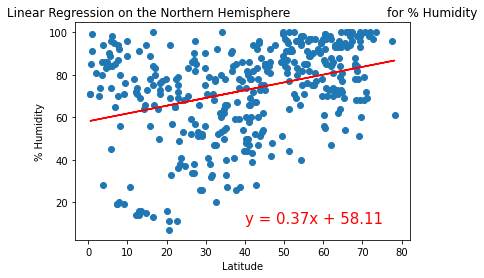

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

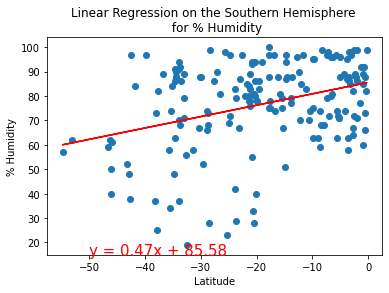

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

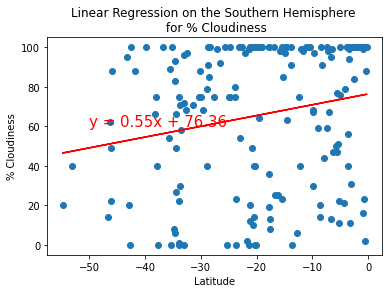

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

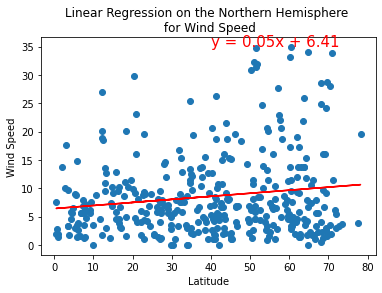

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

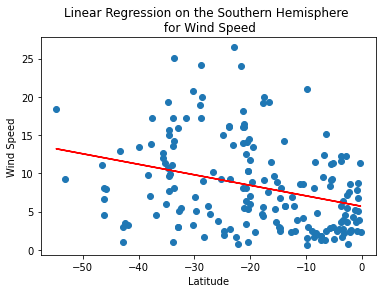

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))